In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

## Question 4

In [130]:
def plot_ellipsis(mu, sigma, P = 0.95, ax = None, **kwargs):
    xy = mu
    A = np.linalg.inv(sigma) / (-2. * np.log(1 - P))
    
    if ax is None:
        ax = plt.gca()

    vals, vecs = np.linalg.eig(A)
    print vals, vecs
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    width, height = 1 / np.sqrt(vals)
    ellip = Ellipse(xy=xy, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

In [121]:
mu1 = np.array([0.,0.])

sigma1 =np.array([
    [1., 0.],
    [0, 1.]
])

mu2 = np.array([-10.,0.])

sigma2 =np.array([
    [1., .5],
    [.5, 1.]
])

mu3 = np.array([10.,10.])

sigma3 =np.array([
    [1., .9],
    [.9, 1.]
])

In [122]:
densities = [
    {'mu': mu1, 'sigma':sigma1, 'name': 'Distr1', 'color': 'red'},
    {'mu': mu2, 'sigma':sigma2, 'name': 'Distr2', 'color': 'blue'},
    {'mu': mu3, 'sigma':sigma3, 'name': 'Distr3', 'color': 'green'},
]

In [140]:
for distr in densities:
    distr['samples'] = stats.multivariate_normal.rvs(mean = distr['mu'], cov = distr['sigma'], size = 1000)

[0.1669041 0.1669041] [[1. 0.]
 [0. 1.]]
[0.3338082 0.1112694] [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[1.669041   0.08784426] [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


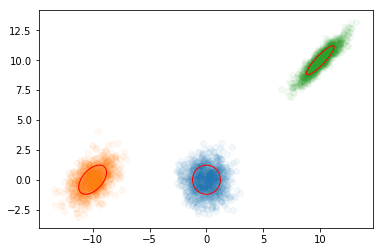

In [141]:
for distr in densities:
    samples = distr['samples']
    mu = distr['mu']
    sigma = distr['sigma']
    plt.scatter(samples[:,0],samples[:,1], alpha=0.05)
    plot_ellipsis(mu, sigma, P = 0.95, color = 'red', fill=False)

## Question 5

In [146]:
mux = np.array([[0.], [0.]])
sigmaxx = np.array([
    [0.7, 0.73],
    [0.73, 1.1]
])
muy = np.array([[0.], [0.]])
sigmayy = np.array([
    [0.7, 0.19],
    [0.19, 0.16]
])
sigmaxy = np.array([
    [0.63, 0.23],
    [0.72, 0.31]
])
y= np.array([[0.27], [0.62]])

In [148]:
mux_y = mux + np.dot(sigmaxy, np.dot(np.linalg.inv(sigmayy), y - muy))
sigmaxx_y = sigmaxx - np.dot(sigmaxy, np.dot(np.linalg.inv(sigmayy), sigmaxy.T))

[1.70066909 0.69219793] [[ 0.99031671  0.13882656]
 [-0.13882656  0.99031671]]


(0.2, 1.5)

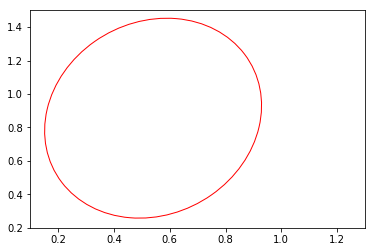

In [155]:
plot_ellipsis(mux_y, sigmaxx_y, P = 0.95, color = 'red', fill=False)
plt.xlim(0.1,1.3)
plt.ylim(0.2,1.5)

In [158]:
mux_y.shape

(2, 1)

In [159]:
sigmaxx_y.shape

(2, 2)